In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
np.random.seed(seed=42)
#----------------------


1. Stochastic Gradient Descent para encontrar el máximo de una función

    * Implementar en Python un algoritmo basado en Stochastic Gradient Descent para encontrar numéricamente el mínimo de ![equation](https://latex.codecogs.com/svg.image?%7B%5Ccolor%7BYellow%7D%20y%20=%20-(x-2)%5E2%20&plus;%203%7D)
    > Hecho GD, falta shuffle para que sea de tipo stocastico
    * ¿Cuál es el máximo valor que encontró el algoritmo y para qué valor de x? 
    >x_max= -10 y_max= -264.8317822938143 y_min=-9274.319036706698 (minimo no acotado)
    * ¿En qué momento detuviste la búsqueda y por qué? 
    > Se detiene a las 4000 iteraciones, ya que se observa que algoritmo convergió.
    * ¿Cómo inicializamos los valores random del algoritmo y cómo afectan la convergencia? 
    > Para inicializar los valores random, se puede utilizar un shuffle o un random de indice. Puede mejorar los tiempos de conergencia.
    * ¿Cuáles son los hiper parámetros del algoritmo?
    > Hiperparametros: Learning Rate, numero de iteraciones, cantidad de parametros a determinar o grado de polinomio, dependiendo de construcción.

> 

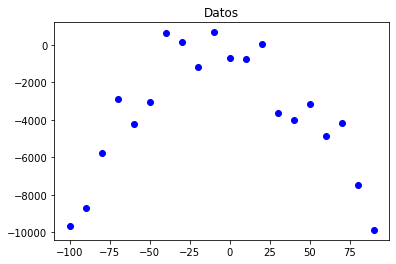

In [3]:
def f(x):  
    np.random.seed(42) 
    a1=-1
    a2=-2
    a3=3
    y = a1*(x + a2)**2 + a3*500*np.random.randn(x.shape[0])
    return y
    
X = np.array(np.arange(-100, 100, 10) )
Y = f(X) 
plt.scatter(X,Y,label='data', color='blue')
plt.title('Datos');


In [22]:
class PolynomailRegression() :
	
	def __init__( self, degree, learning_rate, iterations ) :
		self.degree = degree
		self.learning_rate = learning_rate
		self.iterations = iterations
		
	# polinomio
	def transform( self, X ) :
		# inicialización
		X_transform = np.ones( ( self.m, 1 ) )
		j = 0

		for j in range( self.degree + 1 ) :
			if j != 0 :
				x_pow = np.power( X, j )
				X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
		return X_transform
	
	# normalización
	def normalize( self, X ) :
		X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
		return X
		
	# model training	
	def fit( self, X, Y ) :
		self.X = X
		self.Y = Y
		self.m = self.X.shape[0]
		self.n=1
	
		# inicialización de pesos con random, distribución normal
		self.W = np.random.randn( self.degree + 1 )
		# f( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
		X_transform = self.transform( self.X )
		# f( x ) normalización
		X_normalize = self.normalize( X_transform )	

		# SGD

		lo=[]
		iter=[]
		
		for i in range( self.iterations + 1) :
			
			#se requiere hacer un shuffle 
			

			h = self.predict( self.X )
			error = h - self.Y
			# update weights
			self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error )
			# Obtener el loss
			loss=np.mean((h-self.Y)**2)/2
			#acc = accuracy_score(self.Y, h)
			lo.append(loss)
			iter.append(i)
			#acurr.append(acc)

			print("iteración {}  loss {} ".format(i,max(h),loss))
		for i in range(len(h)):
			if h[i]==max(h):
				max_X=self.X[i]

		print("x_max= {} y_max= {} y_min={}".format(max_X,max(h),min(h)))

		#plt.scatter( iter, lo, color = 'b' )
		plt.plot( iter, lo, color = 'r' )
		plt.title( 'loss' )
		plt.xlabel( 'iter' )
		plt.ylabel( 'loss' )
		plt.show()

		return self
	
	# predict
	def predict( self, X ) :
		# transform X for polynomial h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
		X_transform = self.transform( X )
		X_normalize = self.normalize( X_transform )
		return np.dot( X_normalize, self.W )

iteración 0  loss 1.086346194997179 
iteración 1  loss 0.7107271931251136 
iteración 2  loss 0.37975643179273 
iteración 3  loss 0.04907885017535385 
iteración 4  loss -0.2813056867992678 
iteración 5  loss -0.611397314348114 
iteración 6  loss -0.9411961678323415 
iteración 7  loss -1.2707023827567383 
iteración 8  loss -1.5999160947691742 
iteración 9  loss -1.9288374396600396 
iteración 10  loss -2.257466553361702 
iteración 11  loss -2.5858035719479915 
iteración 12  loss -2.9138486316335985 
iteración 13  loss -3.2416018687735715 
iteración 14  loss -3.569063419862772 
iteración 15  loss -3.8962334215352783 
iteración 16  loss -4.223112010563952 
iteración 17  loss -4.54969932385977 
iteración 18  loss -4.87599549847139 
iteración 19  loss -5.202000671584592 
iteración 20  loss -5.527714980521651 
iteración 21  loss -5.853138562740924 
iteración 22  loss -6.178271555836233 
iteración 23  loss -6.503114097536425 
iteración 24  loss -6.8276663257046835 
iteración 25  loss -7.1519283

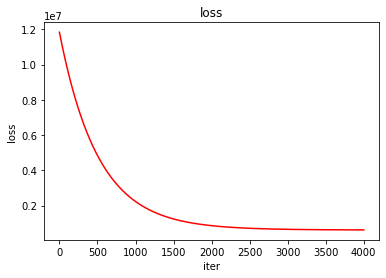

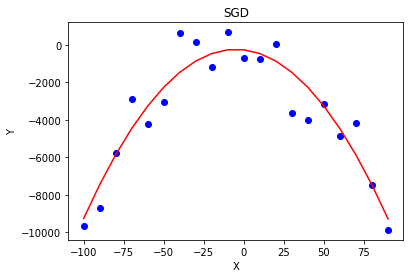

In [24]:
# model training

model = PolynomailRegression( degree = 2, learning_rate = 0.001, iterations = 4000 )
model.fit( X, Y )
# Prediction on training set
Y_pred = model.predict( X )
# Visualization
plt.scatter( X, Y, color = 'b' )
plt.plot( X, Y_pred, color = 'r' )
plt.title( 'SGD' )
plt.xlabel( 'X' )
plt.ylabel( 'Y' )
plt.show()
